In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"), "with Python version")
!python --version


Notebook was last executed on: 2025-May-04 with Python version
Python 3.13.0


In [2]:
IFrame('https://media.licdn.com/dms/image/v2/D4D12AQEV3rWBJcf3Fg/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1685722706540?e=1751500800&v=beta&t=WQj-GzpEFJyK5cxW6DLe9OxMYznxWjeFFjbpx6FfXoo', width=1000, height=600)

## Table of Contents

1. Project Objective
2. Library Imports and Setup
3. Web Scraping LinkedIn Job Listings
4. Data Merging
5. Skill Mapping and Enrichment
6. Data Cleaning
7. Exploratory Data Analysis (EDA)
8. Job Demand Recommendation
9. Conclusions and Key Insights
   


# Project Objective
The objective of this project is to employ web scraping techniques using BeautifulSoup to collect LinkedIn job data, followed by a systematic approach to data cleaning, Exploratory Data Analysis (EDA), and visualizations. The goal is to derive meaningful market insights related to job trends, in-demand skills, location preferences, and seniority levels across various sectors. By analyzing and visualizing this data, the project aims to provide actionable insights for job seekers, recruiters, and industry professionals, facilitating a deeper understanding of the evolving job market landscape.

## Library Imports and Setup

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import random

In [4]:
list_url="https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?keywords=Data%20Analyst&location=India&start=175"
response= requests.get(list_url)

In [5]:
response

<Response [200]>

# Web Scraping LinkedIn Job Listings Using BeautifulSoup

In [6]:
list_data= response.text
list_soup= BeautifulSoup(list_data, "html.parser")
page_jobs= list_soup.find_all("li")

In [7]:
job_id= 4206385562
job_url = f"https://www.linkedin.com/jobs-guest/jobs/api/jobPosting/{job_id}"
job_response= requests.get(job_url)
print(job_response.status_code)

200


In [8]:
id_list=[]

for job in page_jobs:
    base_card_div= job.find("div",{"class":"base-card"})
    job_id= base_card_div.get("data-entity-urn").split(":")[3]
    print(job_id)
    id_list.append(job_id)
    

4200856167
4216524934
4192835031
4214006826
4201256530
4218042804
4214030934
4206190119
4199410638
4195259079


In [9]:
id_list

['4200856167',
 '4216524934',
 '4192835031',
 '4214006826',
 '4201256530',
 '4218042804',
 '4214030934',
 '4206190119',
 '4199410638',
 '4195259079']

In [10]:
base_card_div

<div class="base-card relative w-full hover:no-underline focus:no-underline base-card--link base-search-card base-search-card--link job-search-card" data-column="1" data-entity-urn="urn:li:jobPosting:4195259079" data-impression-id="jobs-search-result-9" data-reference-id="vfpzMGRC57nKNbtkXBu+AQ==" data-row="185" data-tracking-id="Nw3d2QATHC3Vzxl80I72Pg==">
<a class="base-card__full-link absolute top-0 right-0 bottom-0 left-0 p-0 z-[2]" data-tracking-client-ingraph="" data-tracking-control-name="public_jobs_jserp-result_search-card" data-tracking-will-navigate="" href="https://in.linkedin.com/jobs/view/data-analyst-quality-assurance-at-glean-4195259079?position=10&amp;pageNum=17&amp;refId=vfpzMGRC57nKNbtkXBu%2BAQ%3D%3D&amp;trackingId=Nw3d2QATHC3Vzxl80I72Pg%3D%3D">
<span class="sr-only">
              
        
        Data Analyst - Quality Assurance
      
      
          </span>
</a>
<div class="search-entity-media">
<img alt="" class="artdeco-entity-image artdeco-entity-image--squar

In [11]:
job_list=[]
for job_id in id_list:
    job_url = f"https://www.linkedin.com/jobs-guest/jobs/api/jobPosting/{job_id}"
    job_response= requests.get(job_url)
    print(job_response.status_code)
    job_soup= BeautifulSoup(job_response.text,"html.parser")
    job_post={}
    try:
        job_post["title"]= job_soup.find("h2",{"class":"top-card-layout__title font-sans text-lg papabear:text-xl font-bold leading-open text-color-text mb-0 topcard__title"}).text.strip()
    except:
        job_post["title"]: None
    try:
        job_post["location"]= job_soup.find("span",{"class": "topcard__flavor topcard__flavor--bullet"}).text.strip()
    except:
        job_post["location"]= None  
    try:
        job_post["Seniority Level"]= job_soup.find("span",{"class":"description__job-criteria-text description__job-criteria-text--criteria"}).text.strip()
    except:
        job_post["Seniority Level"]= None
    try:
        criteria_spans = job_soup.find_all("span", class_="description__job-criteria-text description__job-criteria-text--criteria")
        job_post["Employment Type"] = criteria_spans[1].text.strip() if len(criteria_spans) > 1 else None
        job_post["Industries"] = criteria_spans[3].text.strip() if len(criteria_spans) > 3 else None
    except:
        job_post["Employment Type"] = None
        job_post["Industries"] = None       
    try:
        job_post["Company_name"]= job_soup.find("a",{"class":"topcard__org-name-link topcard__flavor--black-link"}).text.strip()
    except:
        job_post["Company_name"]= None
    try:
        job_post["time_posted"]= job_soup.find("span",{"class":"posted-time-ago__text topcard__flavor--metadata"}).text.strip()
    except:
        job_post["time_posted"]= None  
    try:
        job_post["num_applicants"]= job_soup.find("figure",{"class":"num-applicants__figure topcard__flavor--metadata topcard__flavor--bullet"}).text.strip()  
    except:
        job_post["num_applicants"]= None    
        
    job_list.append(job_post)


200
200
200
200
200
200
200
200
200
200


In [12]:
job_list

[{'title': 'Reporting Analyst | Ahmedabad, India',
  'location': 'Ahmedabad, Gujarat, India',
  'Seniority Level': 'Associate',
  'Employment Type': 'Full-time',
  'Industries': 'IT Services and IT Consulting and Outsourcing and Offshoring Consulting',
  'Company_name': 'Confidential',
  'time_posted': '4 weeks ago',
  'num_applicants': None},
 {'title': 'Reference Data Analyst',
  'location': 'Mumbai, Maharashtra, India',
  'Seniority Level': 'Not Applicable',
  'Employment Type': 'Full-time',
  'Industries': 'Financial Services',
  'Company_name': 'JPMorganChase',
  'time_posted': '1 week ago',
  'num_applicants': 'Be among the first 25 applicants'},
 {'title': 'Real World Data Analyst I [T500-16951]',
  'location': 'Hyderabad, Telangana, India',
  'Seniority Level': 'Mid-Senior level',
  'Employment Type': 'Full-time',
  'Industries': 'Pharmaceutical Manufacturing',
  'Company_name': 'Bristol Myers Squibb',
  'time_posted': '1 week ago',
  'num_applicants': None},
 {'title': 'Data A

In [13]:
jobs_df1= pd.DataFrame(job_list)
jobs_df1

,title,location,Seniority Level,Employment Type,Industries,Company_name,time_posted,num_applicants
0,"Reporting Analyst | Ahmedabad, India","Ahmedabad, Gujarat, India",Associate,Full-time,IT Services and IT Consulting and Outsourcing ...,Confidential,4 weeks ago,None
1,Reference Data Analyst,"Mumbai, Maharashtra, India",Not Applicable,Full-time,Financial Services,JPMorganChase,1 week ago,Be among the first 25 applicants
2,Real World Data Analyst I [T500-16951],"Hyderabad, Telangana, India",Mid-Senior level,Full-time,Pharmaceutical Manufacturing,Bristol Myers Squibb,1 week ago,None
3,Data Analyst,Greater Delhi Area,Entry level,Full-time,Consumer Services,WIN Home Inspection,1 week ago,Over 200 applicants
4,Data Analyst,India,Mid-Senior level,Full-time,Advertising Services,ITCAN Technology and Digital Marketing,3 weeks ago,Over 200 applicants
5,Data Analyst - L4,"Bengaluru, Karnataka, India",Entry level,Full-time,IT Services and IT Consulting,Wipro,3 days ago,None
6,Data Analytics & BI Specialist,"Bengaluru, Karnataka, India",Not Applicable,Full-time,"Appliances, Electrical, and Electronics Manufa...",ABB,1 week ago,None
7,Data Analyst,India,Associate,Full-time,Software Development,Stader Labs,3 weeks ago,Over 200 applicants
8,Pharma Analytics,"Bangalore Urban, Karnataka, India",Mid-Senior level,Full-time,Outsourcing and Offshoring Consulting and Busi...,WNS,4 weeks ago,Over 200 applicants
9,Data Analyst - Quality Assurance,"Bengaluru, Karnataka, India",Entry level,Full-time,Software Development,Glean,1 week ago,None


In [14]:
jobs_df1.to_csv("linkedin_jobs_part2.csv", index=False)


In [15]:
import os
os.getcwd()

'/Users/satarupabanik'

# Data Merging

In [16]:
import pandas as pd

path = "/Users/satarupabanik"
file1 = f"{path}/linkedin_jobs.csv"
file2 = f"{path}/linkedin_jobs_part2.csv"
file3 =f"{path}/linkedin_jobs_part3.csv"
file4 = f"{path}/linkedin_jobs_part4.csv"
file5 = f"{path}/linkedin_jobs_part5.csv"
file6 = f"{path}/linkedin_jobs_part6.csv"
file7=  f"{path}/linkedin_jobs_part7.csv"
file8=  f"{path}/linkedin_jobs_part8.csv"
file9=  f"{path}/linkedin_jobs_part9.csv"
file10=  f"{path}/linkedin_jobs_part10.csv"
file11=  f"{path}/linkedin_jobs_part11.csv"
file12=  f"{path}/linkedin_jobs_part12.csv"


# Load both CSVs
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3=pd.read_csv(file3)
df4=pd.read_csv(file4)
df5= pd.read_csv(file5)
df6=pd.read_csv(file6)
df7=pd.read_csv(file7)
df8=pd.read_csv(file8)
df9=pd.read_csv(file9)
df10=pd.read_csv(file10)
df11=pd.read_csv(file11)
df12=pd.read_csv(file12)


# Merged the DataFrames
combined_df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], ignore_index=True)

# Dropped duplicates columns
combined_df.drop_duplicates(inplace=True)

# Saved the merged DataFrame
combined_df.to_csv(f"{path}/linkedin_jobs_combined.csv", index=False)


In [17]:
df= pd.read_csv("linkedin_jobs_combined.csv")

In [18]:
df.tail(10)

,title,location,Seniority Level,Employment Type,Industries,Company_name,time_posted,num_applicants
102,SQL Developer,NaN,NaN,NaN,NaN,Finacus Solutions,2 months ago,Over 200 applicants
103,Database Administrator,"Bengaluru, Karnataka, India",Not Applicable,Full-time,Insurance,AXA XL,1 week ago,NaN
104,Database Administrator,"Gurugram, Haryana, India",Mid-Senior level,Full-time,IT Services and IT Consulting,Mphasis,4 weeks ago,NaN
105,Staff Database Admin,"Bengaluru, Karnataka, India",Mid-Senior level,Full-time,Financial Services,Blackhawk Network,1 week ago,Be among the first 25 applicants
106,MS SQL Database Administrator,Mumbai Metropolitan Region,Director,Full-time,Telecommunications,Jio,3 days ago,NaN
107,MySQL,"Hyderabad, Telangana, India",Not Applicable,Full-time,IT Services and IT Consulting,Tata Consultancy Services,2 weeks ago,NaN
108,DBA,"Andhra Pradesh, India",Associate,Full-time,IT Services and IT Consulting,Virtusa,6 days ago,Be among the first 25 applicants
109,MSSQL Database Administrator/Engineer,"Pune, Maharashtra, India",Entry level,Full-time,Banking,Barclays Business Banking,1 week ago,NaN
110,SQL Server Database Administrator IRC259260,"Gurgaon, Haryana, India",Not Applicable,Full-time,Software Development,GlobalLogic,1 week ago,Be among the first 25 applicants
111,Database Administrator 2-IT,"Noida, Uttar Pradesh, India",Mid-Senior level,Full-time,IT Services and IT Consulting,Oracle,1 week ago,Be among the first 25 applicants


## Skill mapping and enrichment

Since direct scraping of skills was limited, I implemented a custom mapping function to infer skills from job titles, enriching the dataset with an additional 'inferred_skills' column for deeper analysis.


In [19]:
skills_dict = {
    "Reference Data Analyst": "SQL, Data Analysis, Data Management, Excel, Business Intelligence",
    "Shiprocket - Data Analyst - SQL": "SQL, Data Analysis, Business Intelligence, Data Visualization",
    "Senior Analyst-Data Analysis": "SQL, Data Analysis, Excel, Business Intelligence, Reporting",
    "Trainee": "Learning, Data Entry, Communication, Problem Solving",
    "Senior Analyst, Data Intelligence": "SQL, Data Intelligence, Data Analysis, Business Intelligence",
    "Business Intelligence Analyst": "SQL, Power BI, Data Analysis, Reporting, Business Intelligence",
    "Analyst - Dashboards & Automation - USI": "SQL, Dashboards, Automation, Power BI, Data Visualization",
    "Data Analyst": "SQL, Excel, Data Visualization, Power BI, Statistics, Data Cleaning",
    "Pharma Analytics": "SQL, Pharmaceutical Data, Data Analysis, Excel, Statistics",
    "Lead Analyst": "SQL, Data Analysis, Team Leadership, Business Intelligence",
    "Reporting Analyst | Ahmedabad, India": "SQL, Reporting, Data Analysis, Excel, Business Intelligence",
    "Sustainability Data Analyst": "SQL, Data Analysis, Sustainability, Power BI, Reporting",
    "Senior Data Analyst": "SQL, Data Analysis, Excel, Reporting, Business Intelligence",
    "Business Data Analyst": "SQL, Data Analysis, Power BI, Business Intelligence, Statistics",
    "Senior Data Analyst F/M": "SQL, Data Analysis, Excel, Business Intelligence, Reporting",
    "IN_Sr. Associate_Data Analyst_Data & Analytics_Advisory_Bangalore": "SQL, Data Analysis, Business Intelligence, Reporting, Advisory",
    "AI Research Scientist": "AI, Research, Machine Learning, Python, Deep Learning",
    "Data Scientist": "Python, Machine Learning, Data Analysis, Statistics, Pandas, TensorFlow",
    "Solution Data Scientist": "Python, Data Science, Machine Learning, Data Analysis, Solution Design",
    "Data Scientist 1": "Python, Machine Learning, Data Analysis, Statistics, Pandas",
    "Senior Data Scientist, Full-time, Days": "Python, Machine Learning, Data Analysis, Statistics, Pandas, TensorFlow",
    "AI Research Scientist – GenAI": "AI, GenAI, Research, Machine Learning, Deep Learning",
    "Senior Data Scientist (L5), Games": "Python, Machine Learning, Data Science, Game Analytics, TensorFlow",
    "Machine Learning Engineer 4, Firefly GenAI Services": "Machine Learning, GenAI, Python, Deep Learning",
    "Senior Data Scientist": "Python, Machine Learning, Data Analysis, Statistics, Pandas, TensorFlow",
    "Gen AI Associate Director_ Bangalore": "AI, GenAI, Leadership, Machine Learning, Strategy",
    "Machine Learning (Deep Learning & Generative AI) Engineer": "Machine Learning, Deep Learning, AI, Python, TensorFlow",
    "Sr. Data Scientist": "Python, Machine Learning, Data Science, Deep Learning, Pandas",
    "Research Scientist, Agents, Bangalore": "Research, AI, Data Science, Machine Learning, Python",
    "Sr Machine Learning Engineer": "Machine Learning, Deep Learning, AI, Python, TensorFlow",
    "Staff Data Scientist, Ads Insights and Measurement": "Data Science, Machine Learning, Analytics, Advertising, Python",
    "Machine Learning Engineer": "Machine Learning, Python, Deep Learning, AI, TensorFlow",
    "AI/ML Engineer": "AI, Machine Learning, Python, TensorFlow, Deep Learning",
    "Data Scientist-Gen AI": "Data Science, GenAI, Machine Learning, Python, TensorFlow",
    "Senior Director - AI / ML Engineer [T500-17200]": "AI, Machine Learning, Leadership, Strategy, Deep Learning",
    "Business Analyst, Alexa AI": "AI, Data Analysis, Business Intelligence, Reporting, Excel",
    "AI ML Engineer": "AI, Machine Learning, Deep Learning, Python, TensorFlow",
    "Python AI/ML Developer": "Python, AI, Machine Learning, Deep Learning, TensorFlow",
    "Data Scientist II": "Python, Machine Learning, Data Analysis, Statistics, Pandas",
    "BI Developer 1": "Power BI, SQL, Data Analysis, Business Intelligence",
    "Power BI Developer - Assistant Manager": "Power BI, SQL, Data Visualization, Reporting, Business Intelligence",
    "Power BI Developer - Consultant": "Power BI, SQL, Data Visualization, Reporting, Consulting",
    "Power BI Developer": "Power BI, SQL, Data Visualization, Business Intelligence",
    "PowerBI Developer": "Power BI, SQL, Data Visualization, Business Intelligence",
    "Business Intelligence Developer(Tableau)": "Tableau, SQL, Data Analysis, Business Intelligence",
    "Python with Power BI": "Python, Power BI, Data Analysis, Data Visualization",
    "Data Engineer": "SQL, Data Engineering, ETL, Python, Data Pipelines",
    "Associate, Data Engineer": "SQL, Data Engineering, ETL, Python, Data Pipelines",
    "Associate Data Engineer": "SQL, Data Engineering, ETL, Python, Data Pipelines",
    "Financial Operations Analyst (Contractual)": "Financial Analysis, Excel, Data Analysis, Reporting",
    "Financial Analyst, FinOps FP&A": "Financial Analysis, Excel, FP&A, Budgeting",
    "Business Finance Analyst": "Financial Analysis, Excel, Business Intelligence, Data Analysis",
    "Financial Planning Analyst": "Financial Planning, Excel, Data Analysis, Reporting",
    "Private Equity Analyst": "Financial Analysis, Equity Research, Excel, Business Intelligence",
    "Analyst-GFS-Financial Operations-Hyderabad-Encore": "Financial Operations, Data Analysis, Reporting, Excel",
    "Structured Finance Analyst, AVP": "Structured Finance, Financial Analysis, Excel, Reporting",
    "Asset & Wealth Management, Finance and Strategy, Analyst, Bengaluru": "Finance, Strategy, Asset Management, Data Analysis",
    "Associate Manager - Revenue Growth Management": "Revenue Growth, Finance, Data Analysis, Strategy",
    "Market Research Analyst (Freelancer)": "Market Research, Data Analysis, Excel, Reporting",
    "Market Research Analyst": "Market Research, Data Analysis, Excel, Reporting",
    "Campaign Analyst": "Campaign Analysis, Data Analysis, Marketing, Excel",
    "Field Marketing Specialist": "Marketing, Data Analysis, Campaign Analysis, Excel",
    "Marketing Operations - Analyst": "Marketing Operations, Data Analysis, Excel, Reporting",
    "SEO Analyst": "SEO, Google Analytics, Data Analysis, Excel",
    "Senior Analyst, Category Management": "Category Management, Data Analysis, Reporting, Excel",
    "Media Analyst": "Media Analysis, Data Analysis, Excel, Marketing",
    "Software Engineer": "Python, Java, C++, Algorithms, Data Structures",
    "Full Stack developer": "JavaScript, HTML, CSS, Node.js, React",
    "Software Engineer -III, ITC": "Python, Java, C++, Software Engineering, Problem Solving",
    "Junior Software Engineer, Full-Stack": "JavaScript, HTML, CSS, Node.js, React",
    "Software Development Engineer I": "Java, C++, Algorithms, Data Structures, Problem Solving",
    "Node JS Developer": "Node.js, JavaScript, Express, API Development",
    "Software Development Engineer": "Java, C++, Algorithms, Data Structures, Software Engineering",
    "PL/SQL Developer-Core Banking": "PL/SQL, Core Banking, Database Management",
    "SQL Developer": "SQL, Database Management, T-SQL, Query Optimization",
    "SQL Developer Apprentice": "SQL, Database Management, Data Entry, Learning",
    "Database Oracle PLSQL Developer": "Oracle, PL/SQL, Database Management, Tuning",
    "SQL Developer (Senior)": "SQL, Database Management, T-SQL, Query Optimization",
    "SQL Developer Trainee": "SQL, Database Management, Learning",
    "ETL Developer": "ETL, SQL, Data Integration, Data Warehousing",
    "PowerBi Developer": "Power BI, Data Analysis, Business Intelligence, SQL",
    "Database Administrator": "SQL, Database Administration, Performance Tuning, Backups, Indexing",
    "Staff Database Admin": "SQL, Database Administration, Performance Tuning, Backups, Indexing",
    "MS SQL Database Administrator": "SQL, Database Administration, MS SQL Server, Performance Tuning",
    "MySQL": "MySQL, Database Management, SQL",
    "DBA": "SQL, Database Management, Database Administration, Tuning",
    "MSSQL Database Administrator/Engineer": "MS SQL Server, Database Administration, Performance Tuning, SQL",
    "SQL Server Database Administrator IRC259260": "SQL, SQL Server, Database Administration",
    "Database Administrator 2-IT": "SQL, Database Administration, Performance Tuning, Backups"
}


In [20]:
def infer_skills(job_title):
    job_title = job_title.lower()  # Convert to lowercase for easier matching
    for title, skills in skills_dict.items():
        if title.lower() in job_title:  # Check if job title matches any known titles
            return skills
    return []  # Return an empty list if no match is found

df['inferred_skills'] = df['title'].apply(infer_skills)
print(df[['title', 'inferred_skills']])



                                           title  \
0                         Reference Data Analyst   
1                Shiprocket - Data Analyst - SQL   
2                   Senior Analyst-Data Analysis   
3                                        Trainee   
4                   Senior Analyst-Data Analysis   
..                                           ...   
107                                        MySQL   
108                                          DBA   
109        MSSQL Database Administrator/Engineer   
110  SQL Server Database Administrator IRC259260   
111                  Database Administrator 2-IT   

                                       inferred_skills  
0    SQL, Data Analysis, Data Management, Excel, Bu...  
1    SQL, Data Analysis, Business Intelligence, Dat...  
2    SQL, Data Analysis, Excel, Business Intelligen...  
3    Learning, Data Entry, Communication, Problem S...  
4    SQL, Data Analysis, Excel, Business Intelligen...  
..                               

In [21]:
df.tail(10)

,title,location,Seniority Level,Employment Type,Industries,Company_name,time_posted,num_applicants,inferred_skills
102,SQL Developer,NaN,NaN,NaN,NaN,Finacus Solutions,2 months ago,Over 200 applicants,"SQL, Database Management, T-SQL, Query Optimiz..."
103,Database Administrator,"Bengaluru, Karnataka, India",Not Applicable,Full-time,Insurance,AXA XL,1 week ago,NaN,"SQL, Database Administration, Performance Tuni..."
104,Database Administrator,"Gurugram, Haryana, India",Mid-Senior level,Full-time,IT Services and IT Consulting,Mphasis,4 weeks ago,NaN,"SQL, Database Administration, Performance Tuni..."
105,Staff Database Admin,"Bengaluru, Karnataka, India",Mid-Senior level,Full-time,Financial Services,Blackhawk Network,1 week ago,Be among the first 25 applicants,"SQL, Database Administration, Performance Tuni..."
106,MS SQL Database Administrator,Mumbai Metropolitan Region,Director,Full-time,Telecommunications,Jio,3 days ago,NaN,"SQL, Database Administration, Performance Tuni..."
107,MySQL,"Hyderabad, Telangana, India",Not Applicable,Full-time,IT Services and IT Consulting,Tata Consultancy Services,2 weeks ago,NaN,"MySQL, Database Management, SQL"
108,DBA,"Andhra Pradesh, India",Associate,Full-time,IT Services and IT Consulting,Virtusa,6 days ago,Be among the first 25 applicants,"SQL, Database Management, Database Administrat..."
109,MSSQL Database Administrator/Engineer,"Pune, Maharashtra, India",Entry level,Full-time,Banking,Barclays Business Banking,1 week ago,NaN,"SQL, Database Administration, Performance Tuni..."
110,SQL Server Database Administrator IRC259260,"Gurgaon, Haryana, India",Not Applicable,Full-time,Software Development,GlobalLogic,1 week ago,Be among the first 25 applicants,"SQL, Database Administration, Performance Tuni..."
111,Database Administrator 2-IT,"Noida, Uttar Pradesh, India",Mid-Senior level,Full-time,IT Services and IT Consulting,Oracle,1 week ago,Be among the first 25 applicants,"SQL, Database Administration, Performance Tuni..."


# Data Cleaning
Performed Data Cleaning by handling missing values, ensuring inferred skills were stored as lists, and standardizing column formats for consistency and easier analysis.


In [22]:
df.isnull().sum()

title               0
location           16
Seniority Level    16
Employment Type    16
Industries         16
Company_name        0
time_posted         0
num_applicants     47
inferred_skills     0
dtype: int64

In [23]:
df[['location', 'Seniority Level', 'Employment Type', 'Industries']] = df[
    ['location', 'Seniority Level', 'Employment Type', 'Industries']
].fillna("Not Specified")

In [24]:
df['time_posted'] = df['time_posted'].fillna("Not Specified")

In [25]:
df['num_applicants'] = pd.to_numeric(df['num_applicants'], errors='coerce').fillna(0).astype(int)

In [26]:
df.isnull().sum()

title              0
location           0
Seniority Level    0
Employment Type    0
Industries         0
Company_name       0
time_posted        0
num_applicants     0
inferred_skills    0
dtype: int64

In [27]:
def clean_skills(x):
    if isinstance(x, str):
        return [skill.strip().title() for skill in x.split(',') if skill.strip()]
    elif isinstance(x, list):
        return [skill.strip().title() for skill in x if isinstance(skill, str)]
    else:
        return []

df['inferred_skills'] = df['inferred_skills'].apply(clean_skills)


In [28]:
df['Seniority Level'] = df['Seniority Level'].str.strip()
df['Employment Type'] = df['Employment Type'].str.strip()
df['Industries'] = df['Industries'].str.strip()
df['Company_name'] = df['Company_name'].str.strip().str.title()
df['location'] = df['location'].str.strip()

In [29]:
def clean_title(title):
    title = title.lower()
    title = re.sub(r'[^a-zA-Z\s]', '', title)
    title = title.title()
    return title


In [30]:
df.head(10)

,title,location,Seniority Level,Employment Type,Industries,Company_name,time_posted,num_applicants,inferred_skills
0,Reference Data Analyst,"Bengaluru, Karnataka, India",Not Applicable,Full-time,Financial Services,Deutsche Bank,1 week ago,0,"[Sql, Data Analysis, Data Management, Excel, B..."
1,Shiprocket - Data Analyst - SQL,"Gurugram, Haryana, India",Entry level,Full-time,"Data Infrastructure and Analytics, Software De...",Shiprocket,2 weeks ago,0,"[Sql, Data Analysis, Business Intelligence, Da..."
2,Senior Analyst-Data Analysis,"Bengaluru, Karnataka, India",Mid-Senior level,Full-time,Retail,Tesco,2 weeks ago,0,"[Sql, Data Analysis, Excel, Business Intellige..."
3,Trainee,Greater Kolkata Area,Internship,Full-time,IT Services and IT Consulting and Business Con...,Cognizant,2 weeks ago,0,"[Learning, Data Entry, Communication, Problem ..."
4,Senior Analyst-Data Analysis,"Bengaluru, Karnataka, India",Mid-Senior level,Full-time,Retail,Tesco,1 week ago,0,"[Sql, Data Analysis, Excel, Business Intellige..."
5,"Senior Analyst, Data Intelligence","Bengaluru East, Karnataka, India",Not Applicable,Full-time,Hospitals and Health Care,Johnson & Johnson,1 day ago,0,"[Sql, Data Intelligence, Data Analysis, Busine..."
6,Business Intelligence Analyst,"Gurugram, Haryana, India",Associate,Full-time,Software Development,Concentrix,3 weeks ago,0,"[Sql, Power Bi, Data Analysis, Reporting, Busi..."
7,Analyst - Dashboards & Automation - USI,"Hyderabad, Telangana, India",Not Applicable,Full-time,Business Consulting and Services,Deloitte,3 weeks ago,0,"[Sql, Dashboards, Automation, Power Bi, Data V..."
8,Data Analyst,"Chandigarh, India",Entry level,Full-time,"Software Development, IT Services and IT Consu...",Midtown Software,1 day ago,0,"[Sql, Excel, Data Visualization, Power Bi, Sta..."
9,"Reporting Analyst | Ahmedabad, India","Ahmedabad, Gujarat, India",Associate,Full-time,IT Services and IT Consulting and Outsourcing ...,Confidential,4 weeks ago,0,"[Sql, Reporting, Data Analysis, Excel, Busines..."


In [31]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [32]:
df.head(5)

,title,location,seniority_level,employment_type,industries,company_name,time_posted,num_applicants,inferred_skills
0,Reference Data Analyst,"Bengaluru, Karnataka, India",Not Applicable,Full-time,Financial Services,Deutsche Bank,1 week ago,0,"[Sql, Data Analysis, Data Management, Excel, B..."
1,Shiprocket - Data Analyst - SQL,"Gurugram, Haryana, India",Entry level,Full-time,"Data Infrastructure and Analytics, Software De...",Shiprocket,2 weeks ago,0,"[Sql, Data Analysis, Business Intelligence, Da..."
2,Senior Analyst-Data Analysis,"Bengaluru, Karnataka, India",Mid-Senior level,Full-time,Retail,Tesco,2 weeks ago,0,"[Sql, Data Analysis, Excel, Business Intellige..."
3,Trainee,Greater Kolkata Area,Internship,Full-time,IT Services and IT Consulting and Business Con...,Cognizant,2 weeks ago,0,"[Learning, Data Entry, Communication, Problem ..."
4,Senior Analyst-Data Analysis,"Bengaluru, Karnataka, India",Mid-Senior level,Full-time,Retail,Tesco,1 week ago,0,"[Sql, Data Analysis, Excel, Business Intellige..."


In [33]:
df["inferred_skills"]

0      [Sql, Data Analysis, Data Management, Excel, B...
1      [Sql, Data Analysis, Business Intelligence, Da...
2      [Sql, Data Analysis, Excel, Business Intellige...
3      [Learning, Data Entry, Communication, Problem ...
4      [Sql, Data Analysis, Excel, Business Intellige...
                             ...                        
107                    [Mysql, Database Management, Sql]
108    [Sql, Database Management, Database Administra...
109    [Sql, Database Administration, Performance Tun...
110    [Sql, Database Administration, Performance Tun...
111    [Sql, Database Administration, Performance Tun...
Name: inferred_skills, Length: 112, dtype: object

## In this section, I will perform exploratory data analysis (EDA) to uncover key insights from the job listing data. I will visualize the distribution of skills, trends over time, and the relationship between job titles and locations.


In [34]:
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


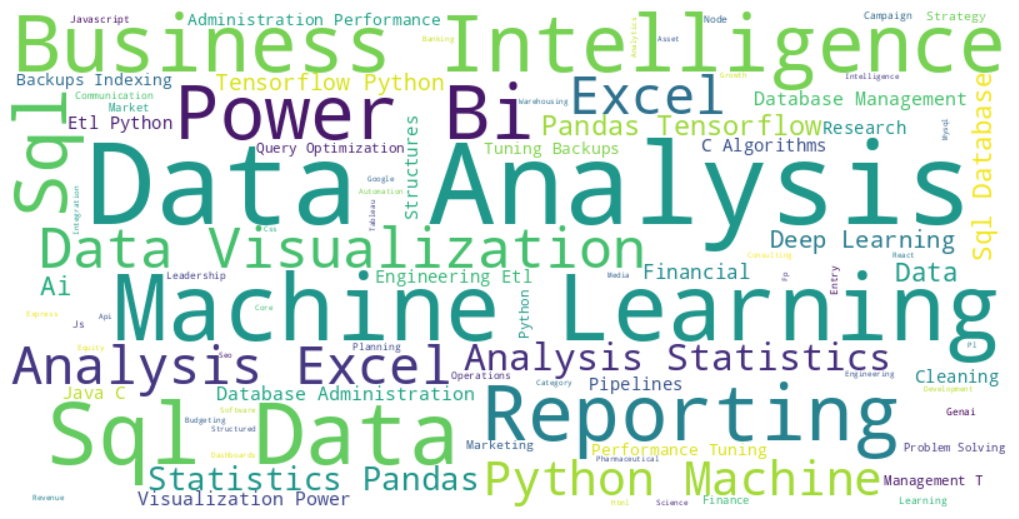

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of skills and join them into one long string
all_skills = ' '.join(df['inferred_skills'].dropna().apply(lambda x: ' '.join(x)))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_skills)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('wordcloud_skills_pic.png', dpi=300, bbox_inches='tight')
plt.show()

## At first, I Applied K-Means clustering to group similar skills from the job posting dataset into meaningful clusters. The goal was to identify patterns and groupings in the data to understand the types of skills that are in demand in the job market.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Join the list of skills into a single string for each entry
df['skills_combined'] = df['inferred_skills'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Convert inferred skills into a bag of words (CountVectorizer)
vectorizer = CountVectorizer(stop_words='english')
skills_matrix = vectorizer.fit_transform(df['skills_combined'].dropna())

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # 5 clusters as an example
kmeans.fit(skills_matrix)

# Plot the top 10 words from each cluster
top_n = 10  # Number of top words to display per cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# Visualize the clusters
for i in range(5):  # For each cluster
    print(f"Cluster {i + 1}:")
    words = [vectorizer.get_feature_names_out()[index] for index in order_centroids[i, :top_n]]
    print("Top words:", ", ".join(words))
    print()

Cluster 1:
Top words: learning, machine, python, tensorflow, data, analysis, statistics, pandas, ai, deep

Cluster 2:
Top words: sql, database, data, administration, tuning, management, performance, algorithms, backups, indexing

Cluster 3:
Top words: data, power, bi, sql, visualization, statistics, excel, cleaning, analysis, automation

Cluster 4:
Top words: analysis, excel, data, reporting, financial, marketing, business, research, intelligence, market

Cluster 5:
Top words: data, sql, intelligence, business, analysis, bi, power, visualization, reporting, etl



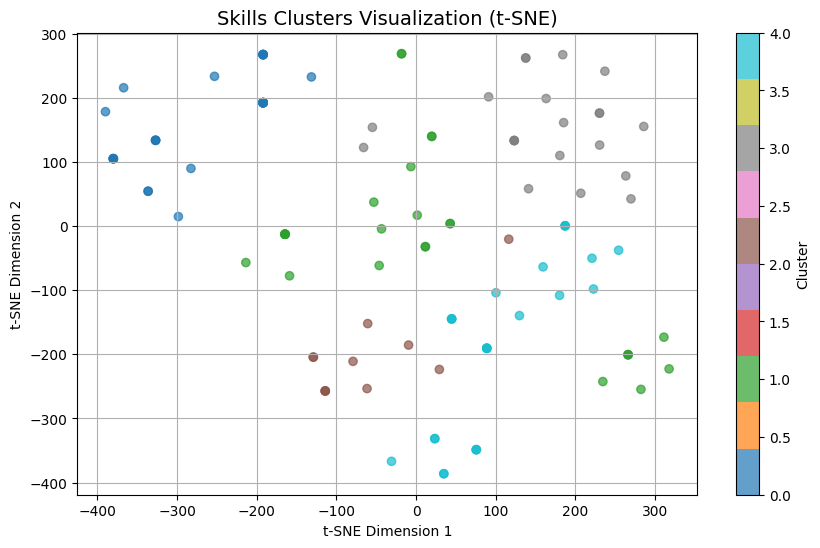

In [37]:
from sklearn.cluster import KMeans

# Apply KMeans clustering again just in case
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(skills_matrix)

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE with updated parameter
tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
skills_tsne = tsne.fit_transform(skills_matrix.toarray())

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(skills_tsne[:, 0], skills_tsne[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.title('Skills Clusters Visualization (t-SNE)', fontsize=14)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()



The t-SNE plot shows that clusters are well-separated with minor overlaps, supporting specialized career paths and targeted upskilling.
The visualization highlights five well-separated skill clusters, corresponding to AI/ML development, business analytics, business intelligence, database administration, and database optimization.

Next, Analysis of the most in-demand skills is done by counting the frequency of each skill across all job postings. This helps identify the top in-demand skills and sets the foundation for further analysis

In [38]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten all skills into one list
all_skills = [skill for sublist in df['inferred_skills'] for skill in sublist]

# Count frequency of each skill
skill_counts = Counter(all_skills)

# Convert to DataFrame
skill_df = pd.DataFrame(skill_counts.items(), columns=['skill', 'count']).sort_values(by='count', ascending=False)


/var/folders/1v/g6bcxzl16s587g__qbw3d0z00000gp/T/ipykernel_95747/3790857325.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skill_df.head(10), x='count', y='skill', palette='bright')


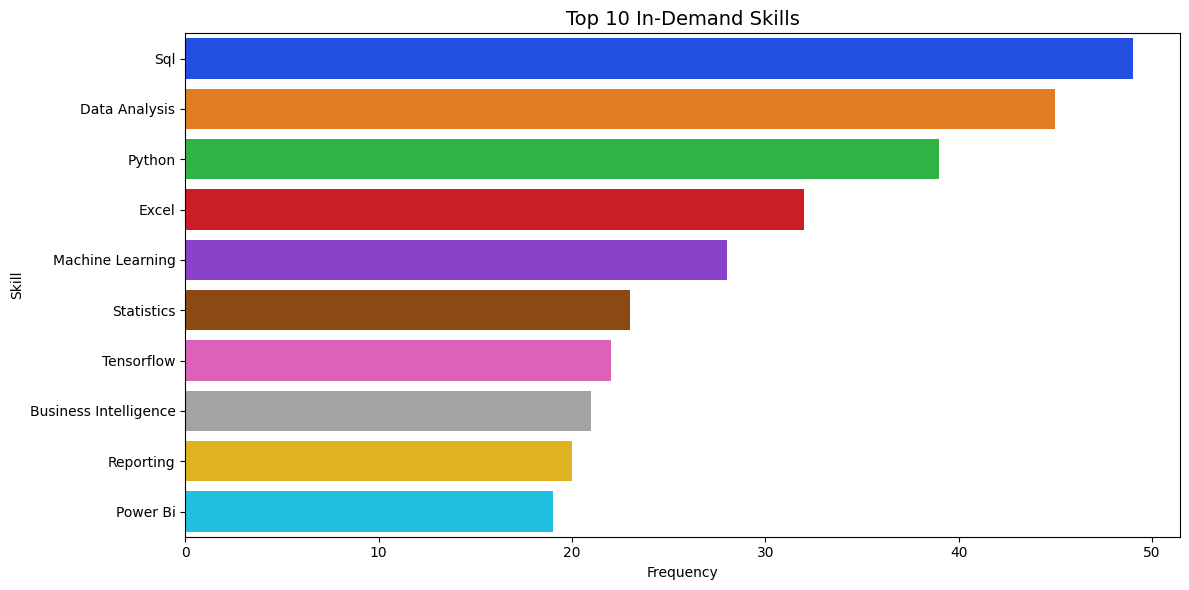

In [53]:
#Top 10 In-Demand Skills
plt.figure(figsize=(12, 6))
sns.barplot(data=skill_df.head(10), x='count', y='skill', palette='bright')

plt.title('Top 10 In-Demand Skills', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.tight_layout()
plt.savefig('Top 10 Demand skills.png', dpi=300, bbox_inches='tight')
plt.show()

1. SQL stands out as the most demanded skill, with a significantly higher frequency compared to others, reflecting its core importance in data-related roles.

2. Python ranks third, reinforcing its critical role in programming and data science.

3. Excel is highly in demand, indicating its continued relevance for business analysts and those working in data-heavy environments.


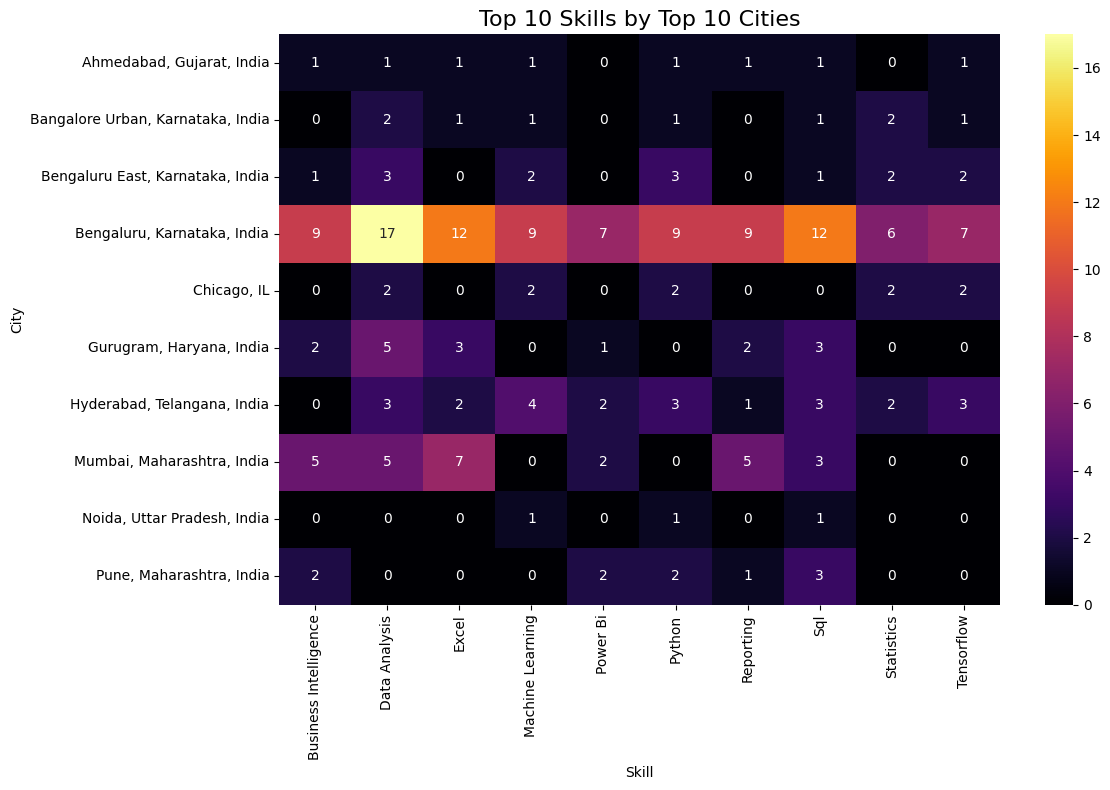

In [40]:
#Top 10 skills by top 10 cities

# Filter out rows where location is "India" or "Not Specified"
df_filtered = df[~df['location'].isin(['India', 'Not Specified'])]

# Count job postings by city (location) and get top 10 cities
top_cities = df_filtered['location'].value_counts().head(10).index.tolist()

# Count skills by location (city)
skill_by_location = df_filtered.explode('inferred_skills') \
    .groupby(['location', 'inferred_skills']).size().reset_index(name='count')

# Filter data to include only the top 10 cities
top_skills_by_location = skill_by_location[skill_by_location['location'].isin(top_cities)]

# Get top 10 most frequent skills
top_skills = skill_df.head(10)['skill'].tolist()

# Filter data for only top skills
top_skills_by_location = top_skills_by_location[top_skills_by_location['inferred_skills'].isin(top_skills)]

# Pivot the table for the heatmap
heatmap_data = top_skills_by_location.pivot_table(index='location', columns='inferred_skills', values='count', aggfunc='sum', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='inferno', fmt='g')
plt.title('Top 10 Skills by Top 10 Cities', fontsize=16)
plt.xlabel('Skill')
plt.ylabel('City')
plt.tight_layout()
plt.show()


1. Bengaluru stands out as the primary tech and data hub, leading in nearly every skill category.

2. Mumbai and Hyderabad follow closely in data analysis and machine learning.

3. Gurugram and Pune show strong demand for SQL and Excel skills, indicating the importance of corporate and operational analytics.

In [41]:
import pandas as pd
from dateutil import parser
from datetime import datetime, timedelta

# Function to convert relative dates
def convert_relative_dates(date_str):
    try:
        # This will handle relative time like "1 week ago", "2 weeks ago", etc.
        return parser.parse(date_str, fuzzy=True)
    except Exception as e:
        # If parsing fails, return NaT (Not a Time)
        return pd.NaT

# Apply the function to the 'time_posted' column
df['time_posted'] = df['time_posted'].apply(convert_relative_dates)

# Check the results
print(df['time_posted'].head())


0   2025-05-01
1   2025-05-02
2   2025-05-02
3   2025-05-02
4   2025-05-01
Name: time_posted, dtype: datetime64[ns]


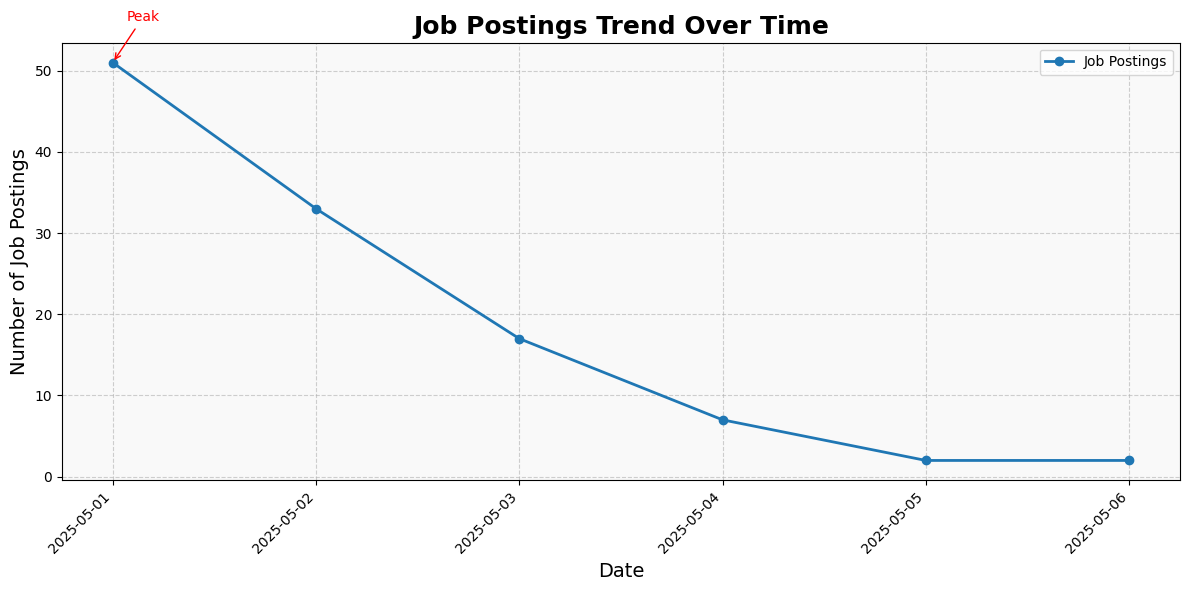

In [52]:
#Job Postings Trend Over Time

# Group by 'time_posted' and count the number of job postings
trend_data = df.groupby(df['time_posted'].dt.date).size().reset_index(name='job_postings')

# Plot the trend over time
# plt.figure(figsize=(10, 6))
# plt.plot(trend_data['time_posted'], trend_data['job_postings'], marker='o', linestyle='-', color='b')
# plt.title('Job Postings Trend Over Time', fontsize=16)
# plt.xlabel('Date')
# plt.ylabel('Number of Job Postings')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Use a modern color and marker
plt.plot(trend_data['time_posted'], trend_data['job_postings'], 
         marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=6, label='Job Postings')

# Titles and labels with better fonts
plt.title('Job Postings Trend Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Job Postings', fontsize=14)

# Rotate x-axis labels and format
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(True, which='major', linestyle='--', alpha=0.6)

# Annotate the max point (optional)
max_point = trend_data['job_postings'].idxmax()
plt.annotate('Peak', 
             xy=(trend_data['time_posted'][max_point], trend_data['job_postings'][max_point]),
             xytext=(10, 30),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')

# Optional: Add a subtle background
plt.gca().set_facecolor('#f9f9f9')

# Tight layout and show
plt.tight_layout()
plt.legend()
plt.savefig('JOB_postings_over_time.png', dpi=300, bbox_inches='tight')
plt.show()



The number of job postings started high on 2025-04-01 (around 50), but showed a rapid decline over the next few days.
By 2025-04-06, the postings dropped to nearly zero.

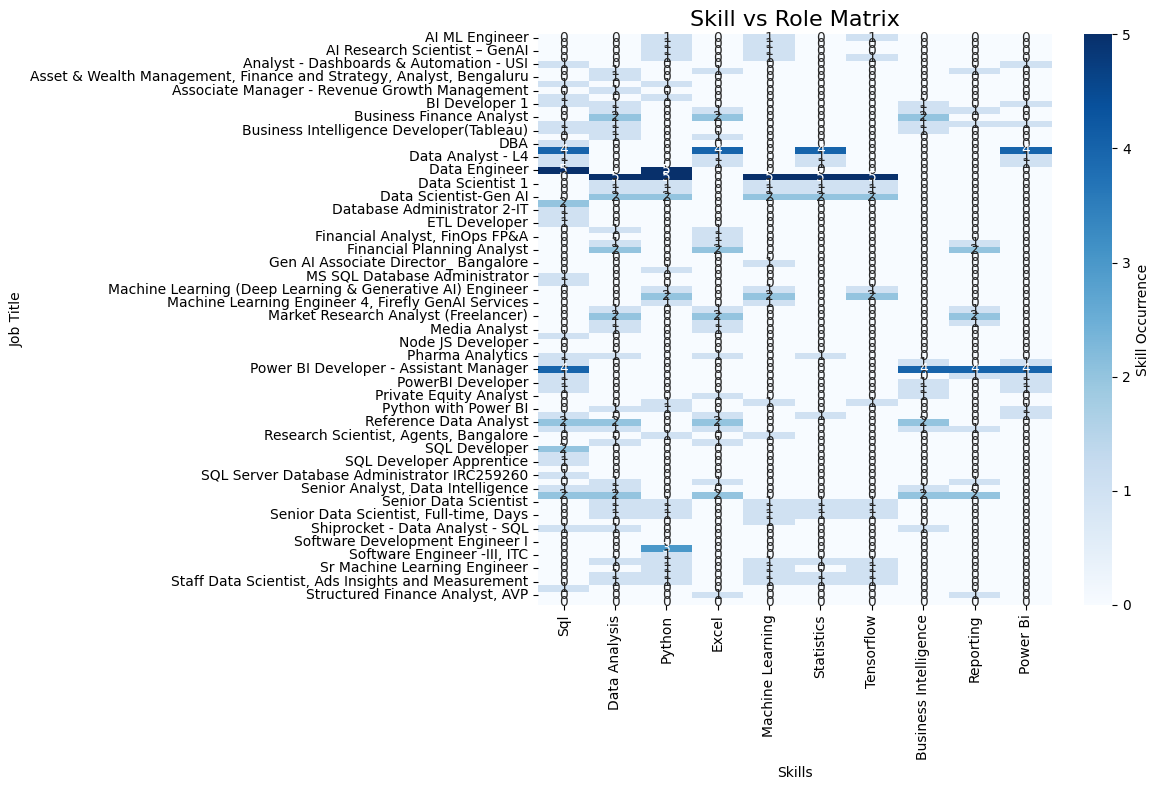

In [43]:
# Step 1: Identify the top 10 skills
top_skills = df.explode('inferred_skills')['inferred_skills'].value_counts().head(10).index.tolist()

# Step 2: Count occurrences of each skill for each job title
skill_role_matrix = df.explode('inferred_skills') \
    .groupby(['title', 'inferred_skills']) \
    .size().unstack(fill_value=0)

# Filter for only the top 10 skills
skill_role_matrix = skill_role_matrix[top_skills]

# Step 3: Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(skill_role_matrix, annot=True, cmap='Blues', fmt='g', cbar_kws={'label': 'Skill Occurrence'})
plt.title('Skill vs Role Matrix', fontsize=16)
plt.xlabel('Skills')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


This matrix highlights the centrality of SQL, Python, Machine Learning, and Business Intelligence in the modern job market. It suggests that professionals in roles like Data Scientists, ML Engineers, and Power BI Developers need a blend of both technical and business skills, such as data manipulation, statistical analysis, and data visualization. The rise of AI/ML roles is also evident, with specialized skills like TensorFlow gaining prominence.

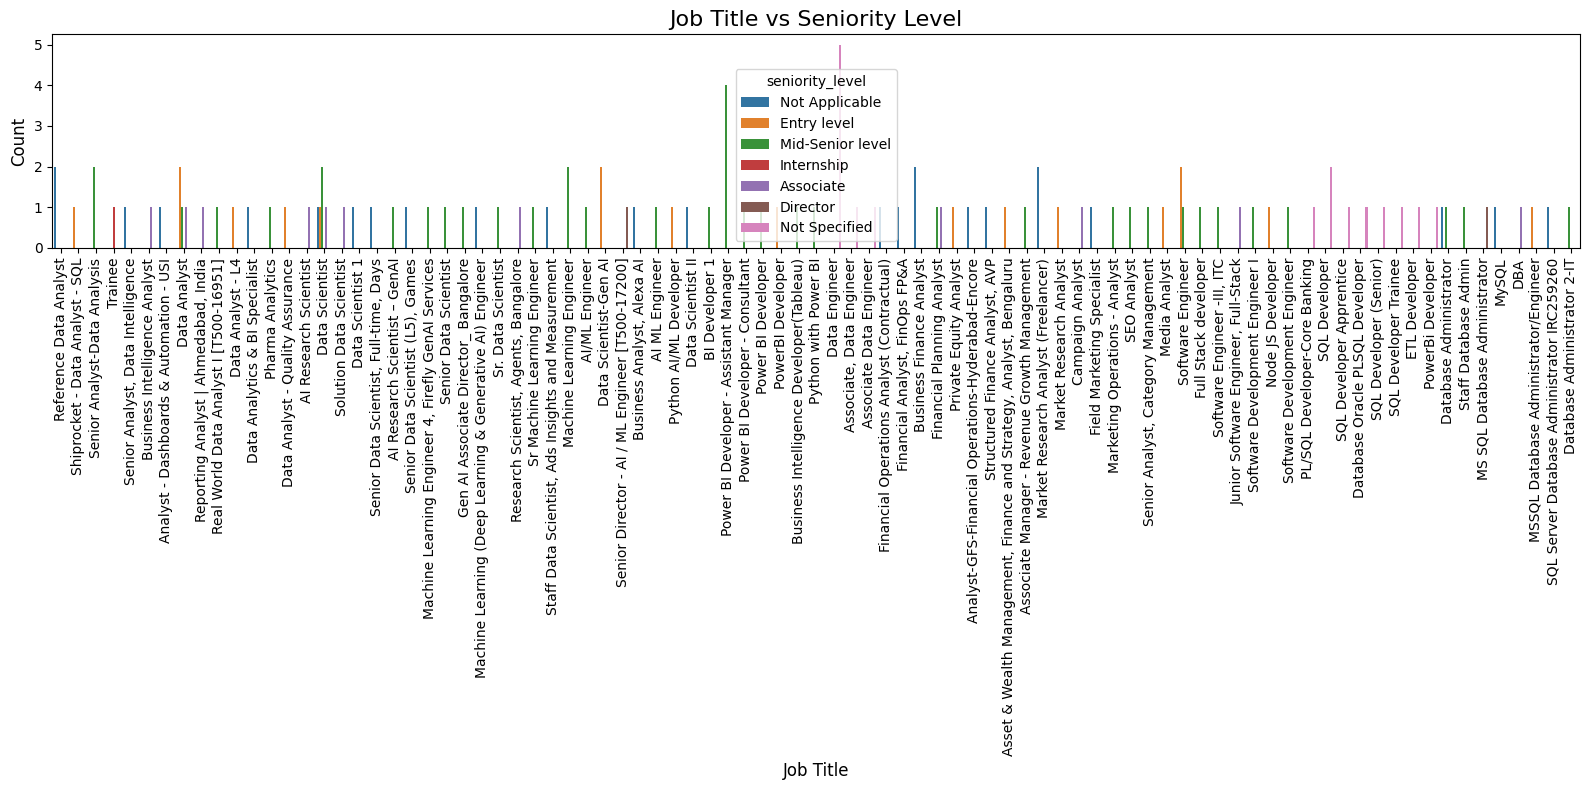

In [44]:
#Visualizing the Relationship Between Job Titles and Seniority Levels

plt.figure(figsize=(16, 8))  # Increase the figure size further
sns.countplot(data=df, x='title', hue='seniority_level', palette='tab10')

# Title and axis labels
plt.title('Job Title vs Seniority Level', fontsize=16)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x labels and adjust the horizontal alignment
plt.xticks(rotation=90, ha='center', fontsize=10)  # 90-degree rotation and central alignment

# Ensure tight layout to adjust for label overlaps
plt.tight_layout()

# Show the plot
plt.show()


1. Senior-level roles remain the most in-demand, especially in AI and machine learning fields.

2. There is strong interest in entry-level talent, ensuring the pipeline for future data professionals remains robust.

3. The chart highlights that technical roles such as Data Scientists, Machine Learning Engineers, and Power BI Developers are particularly in demand across mid-level to senior roles.

## Job Demand Recommendation

In [45]:
import pandas as pd

def get_top_skills_by_cities(
    job_df: pd.DataFrame,
    skill_df: pd.DataFrame,
    city_col: str = 'location',
    skill_col: str = 'inferred_skills',
    count_col: str = 'count',
    top_n_cities: int = 5,
    top_n_skills: int = 10
) -> pd.DataFrame:
    """
    Return the top skills aggregated across the top-N cities by job postings.
    """
    top_cities = (
        job_df[city_col]
        .value_counts()
        .nlargest(top_n_cities)
        .index
        .tolist()
    )
    aggregated = (
        skill_df[skill_df[city_col].isin(top_cities)]
        .groupby(skill_col, as_index=False)[count_col]
        .sum()
        .sort_values(by=count_col, ascending=False)
    )
    return aggregated.head(top_n_skills)


def print_skill_mentions(df: pd.DataFrame, skill_col: str = 'inferred_skills', count_col: str = 'count'):
    """
    Print each skill as “Skill – X mentions”.
    """
    for _, row in df.iterrows():
        print(f"{row[skill_col]} – {row[count_col]} mentions")


if __name__ == "__main__":
    top_skills_df = get_top_skills_by_cities(df, skill_by_location)
    print("Recommended skills for high-demand cities:")
    print_skill_mentions(top_skills_df)



Recommended skills for high-demand cities:
Data Analysis – 30 mentions
Excel – 24 mentions
Sql – 21 mentions
Reporting – 17 mentions
Business Intelligence – 16 mentions
Machine Learning – 13 mentions
Python – 12 mentions
Power Bi – 12 mentions
Data Visualization – 11 mentions
Tensorflow – 10 mentions


This analysis highlights that proficiency in Data Analysis, Excel, and SQL is highly valued in the job market, especially for positions requiring strong analytical and reporting skills. Furthermore, expertise in tools like Power BI, Python, and machine learning frameworks such as TensorFlow is increasingly sought after. Job seekers targeting these cities should focus on enhancing these skills to increase their employability and remain competitive in the evolving job market.

## Conclusion

This project involved real-time scraping of LinkedIn job postings, followed by systematic data cleaning, exploratory analysis, and visualization to extract meaningful market insights.

Through web scraping and manual skill inference, a consolidated dataset was created, combining over 100 job listings from 12 sources.

**Key Insights:**
- **SQL**, **Python**, and **Power BI** emerged as the most in-demand technical skills.
- **Bengaluru**, **Hyderabad**, and **Pune** were identified as top hiring locations.
- **Entry-level** and **Mid-senior level** roles dominated the job market.

Given the limited dataset size, machine learning modeling was not pursued.  
The project concludes with actionable insights derived from the available data, offering a snapshot of current hiring trends in the data domain.


In [48]:
df.to_csv('final_linkedin_jobs.csv', index=False)
